<h1>HW2 by Hyomin Jeong</h1>

#### Bayes' theorem:
\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

# Question 1
### Read the following example and complete the exercises 

You are at the age of 21 and curious about if drinking alcohol would cause liver disease. You contacted a clinic site and got the following information.

1. Past data tells you that 10% of patients entering the clinic have liver disease (**Prior**). 

2. Five percent of the clinic’s patients are alcoholics (**Marginal Probability**). 

3. Among the patients diagnosed with liver disease, 15% are alcoholics (**Likelihood**). 

Now you wonder what is the probability of a patient from the clinic have liver disease given that the patient is alcoholic (**Posterior**)

### 1.1 

#### If A represents the event of being an alcoholic patient in the clinic and L represents the event of being a patient with liver disease in the clinic, write the bayesian representation (P(A|B)) in the following cells


Posterior = P(L|A)

Prior = P(L)

Likelihood = P(A|L)

Marginal Probability = P(A)

### 1.2 

#### Define all the information available and calculate the posterior probability

In [1]:
#Prior = probability of a patient with liver disease
prior = 0.1

#Marginal probability = probability of a patient being an alcoholic
marginal_probability = 0.05

#Likelihood = likelihood of a patient with liver disease being an alcoholic
likelihood = 0.15

#Posterior probability = probability of a patient having liver disease given that the patient is an alcoholic
posterior = (likelihood * prior) / marginal_probability

println(posterior)


0.3


# Question 2
### Read the following example and complete the exercises 
Shown by a <a href="https://pubmed.ncbi.nlm.nih.gov/34242764/#:~:text=The%20overall%20sensitivity%20of%20the,%25%20CI%2024.4%2D65.1">reaserch study</a>, the rapid antigen test for Covid has a sensitivity of 65.3% and a specificity of 99.9%. Assume 1% people have Covid. 

### 2.1 


#### The probability of which event is considered marginal probability in this case? Define it in the first cell below and calculate it in the second cell below

The event is: a person testing positive on RAT (regardless of whether a person actually has COVID or not.)

In [2]:
# P(co) = prior probability of having COVID
co = 0.01

# P(noco) = prior probability of NOT having COVID = 1 - P(Co)
noco = 1 - co

#P(pos|co) = likelihood of a person with COVID testing positive = sensitivity
pos_co = 0.653

#P(neg|noco) = likelihood of a person with no COVID testing negative = specificity
neg_noco = 0.999

#P(pos|noco) = likelihood of a person with no COVID testing positive
pos_noco = 1 - neg_noco

# P(pos) = marginal probability of testing positive for COVID
pos = (pos_co * co) + (pos_noco * noco)

print(pos)

0.007520000000000001

### 2.2 

#### If randomly select a person and he/she tests positive using the rapid antigen test, what is the probability the person has Covid (posterior)? Define all the information and calculate the probability the randomly selected person has Covid

In [3]:
# P(co|pos) = posterior probability of a person tested positive actually has COVID
co_pos = (pos_co * co) / pos

print(co_pos)

0.8683510638297872

# Question 3
### <a href="https://juliastats.org/Distributions.jl/stable/starting/">This page</a> is the documentation for Distribution.jl and complete the exercies

### 3.1 

#### Randomly draw 1000 samples from a normal distribution with mean = 5 and std = 2

In [4]:
using Random
using Distributions

Random.seed!(123)
samples_normal = rand(Normal(5,2), 1000)
return samples_normal

1000-element Vector{Float64}:
 3.7085386557920463
 2.073497242222157
 1.7527925088278389
 4.5646697864329076
 5.984491373050366
 6.961959624248298
 5.15991365901012
 8.098249106085584
 2.3167815182335563
 5.8243232693659355
 6.1863947762419516
 3.463182162537386
 4.847664109095126
 ⋮
 6.247790665546262
 5.438084785027371
 5.299552975722957
 6.602236558637884
 5.804729417569904
 5.178755748468589
 5.812327059101699
 7.568639904523696
 4.819505796383868
 4.8872935799702955
 4.945875161371136
 4.655382388653741

### 3.2

#### Plot  the distribution above in a histogram

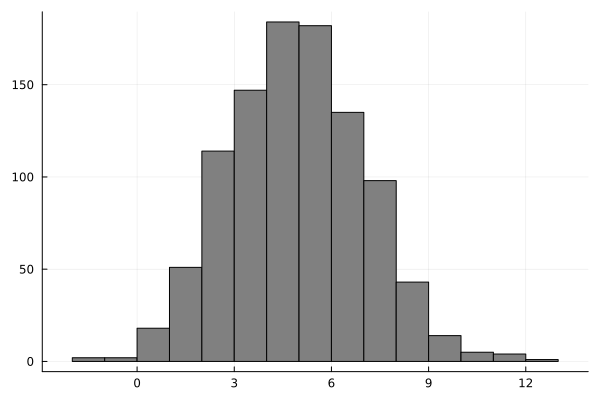

In [5]:
using Plots
histogram(samples_normal, color="gray", legend = false)

### 3.3

#### Plot  the same distribution and change the bins to 50

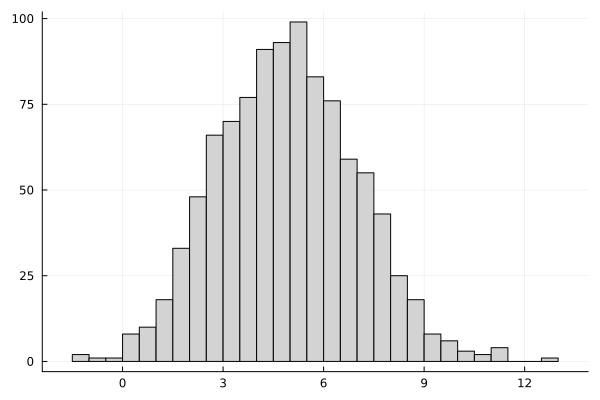

In [6]:
using Plots
histogram(samples_normal, bins=50, color="light gray", legend = false)

### 3.4 

#### Choose a distribution other than normal distribution, Describe what it represents, and draw 1000 samples from the distribution and plot it using parameters of your choice

Which distribution do you pick: Poisson distribution

What does the distribution represent?
=> It is a type of probability distribution that shows a number of events that has occurred randomly and independently in a fixed interval of time or space.

In [7]:
Random.seed!(123)
samples_poisson = rand(Poisson(5), 1000)
return samples_poisson

1000-element Vector{Int64}:
  5
  7
  7
  7
  9
  1
  5
  4
  2
  2
  5
  6
  5
  ⋮
  5
  4
 11
  2
  5
  6
  4
 10
  3
  6
  4
  4

### 3.5

#### Plot  the two distributions in the same plot

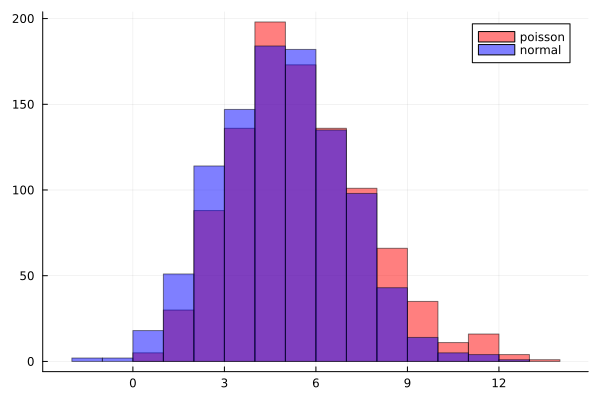

In [8]:
using Plots
histogram(samples_poisson, color="red", label = "poisson", alpha=0.5)
histogram!(samples_normal, color="blue", label = "normal", alpha=0.5)

### 3.6

#### Draw 10000 samples from the two distributions separately and plot them in the same plot

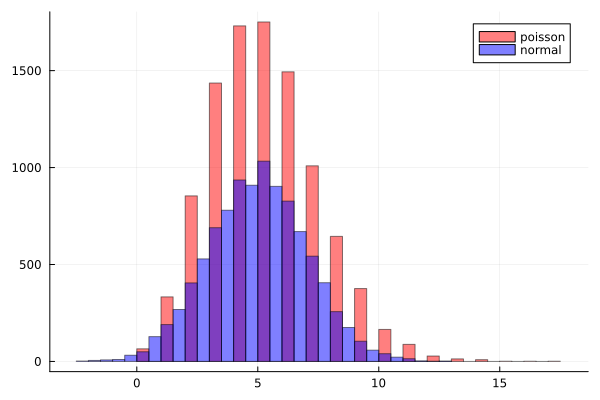

In [9]:
Random.seed!(123)
samples_normal = rand(Normal(5,2), 10000)
return samples_normal
samples_poisson = rand(Poisson(5), 10000)
return samples_poisson

histogram(samples_poisson, color="red", label = "poisson", alpha=0.5)
histogram!(samples_normal, color="blue", label = "normal", alpha=0.5)

# Question 4
### Read the following example and complete the exercises 
Bayes is playing Russian roulette. The revolver has six chambers. He puts two bullets in two adjacent chambers, spin the cylinder, hold the gun to his head, and pull the trigger. It clicks. So it is now the second try: he can choose either to spin the cylinder again or leave it as it is. 

### 4.1

#### What is the probability that Bayes survives the second try given his survival in the first try if he spin the cylinder and explain

If he survives the first try, it means that the two bullets are still in the chambers. So there are 4 empty chambers and 2 bullets. So if he pins the cylinder, the conditions are the same as those of the first try. Then, the probability that Bayes survives the second try after spinning the cylinder is 4/6.

### 4.2
#### In this case, what are the relation between P(B|A), P(B), and P(A) if A represents survival in the first try and B represents survival in the second try

P(A) = the probability of surviving the first try

P(B) = the probability of surviving the second try

P(B|A) = the probability of surviving the second try given that he survives the first try

Since A and B are independent events if he spins the cylinder, the following relationship holds true:

P(B|A) = P(B)

Also, since P(A) is 4/6 because there would be 4 empty chambers and 2 bullets on the first try, 

P(B|A) = P(B) = P(A)

### 4.3

#### What is the probability that Bayes survives both tries without spinning the cylinder and explain

P(AB) = the probability that he survies both of the tries without spinning = P(A) * P(B)

P(A) = 4/6 (calculated in Q4.1)

Calculating P(B):
Let's say that Chambers 3 and 4 have bullets in them. Possible positions of the first try would be Chambers 1, 2, 5, or 6. As he pulls the trigger, the cylinder is shifted to the next chamber, 1->2, 2->3, 5->6, and 6->1.
Of these four options, one of them reaches the chamber with a bullet (2->3) and the rest does not. Therefore, P(B) = 3/4.

In sum, 
P(AB) = the probability that he survies both of the tries without spinning = P(A) * P(B) = (4/6) * (3/4) = 1/2.

### 4.4

#### Use answers from 4.1 and 4.3 to calculate the probability that Bayes survives the second try given his survival in the first try if he doesn't spin the cylinder and explain 

In calculating conditional probability, the following equation holds if A and B are dependent events: 

P(B|A) = P(AB) / P(A)

Since A and B becomes dependent events if he chooses not to spin the cylinder, the probability that he survives the second try given his survival in the first try would be:

P(B|A) = P(AB)/P(A) = (1/2) / (4/6) = 3/4
